# 6 PCA - Task 2

Check using all available ratings, if the three quality features VF, VU, and VD are perceptual dimensions (i.e. factors). 
File to use: Gaming_Video_Quality_dataset.xlsx

## Import and initialize

In [85]:
import itertools

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA # pip3 install sklearn.decomposition --user
from sklearn.preprocessing import StandardScaler
from factor_analyzer.utils import corr, impute_values, partial_correlations, smc # pip3 install factor_analyzer --user
from factor_analyzer.factor_analyzer import calculate_kmo

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook")

FIGSIZE = (20,4)

## Loading the data

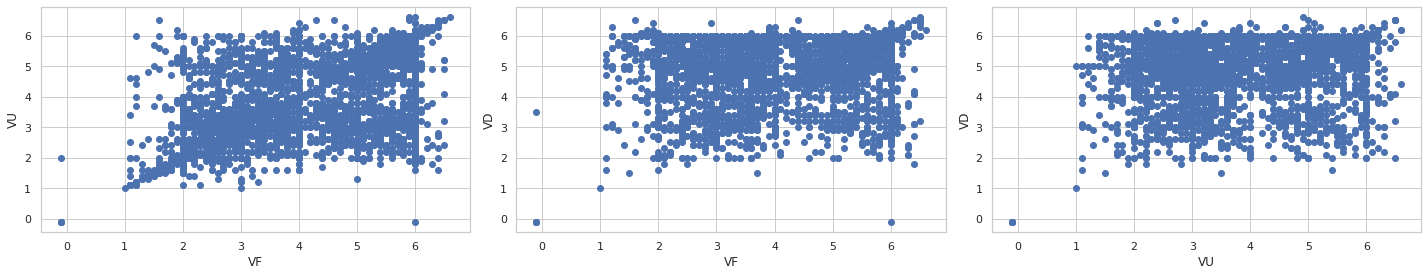

In [91]:
dataset = pd.read_excel("../datasets/DB01_gaming_video_quality_dataset.xlsx", usecols=["VF", "VU", "VD"])

columns = itertools.combinations(dataset.columns, 2)

fig, axs = plt.subplots(1, 3, figsize=FIGSIZE)
for ax, (var1, var2) in zip(axs, columns):
    ax.scatter(dataset[var1], dataset[var2])
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
fig.tight_layout()

In [75]:
pca = PCA(n_components=3)
factored = pca.fit_transform(dataset)

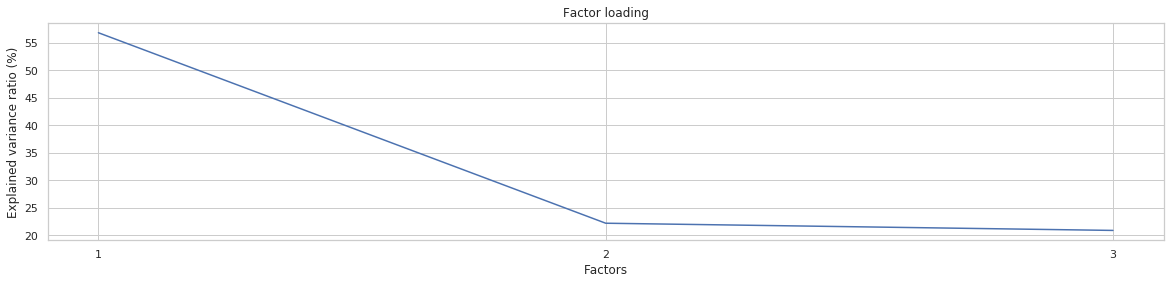

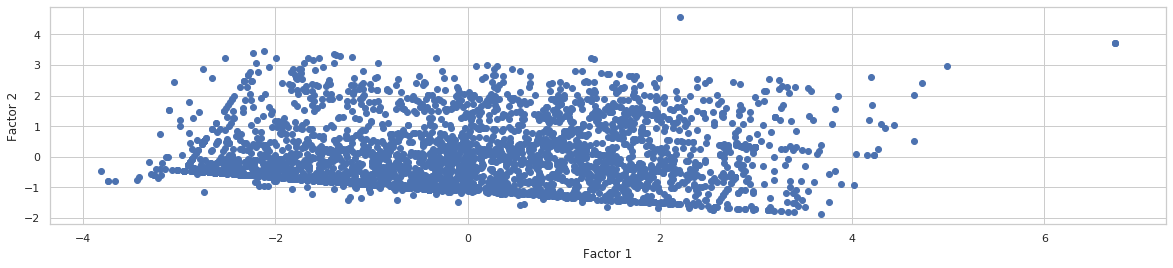

In [84]:
fig, ax = plt.subplots(figsize=FIGSIZE)

x = range(1, pca.n_components + 1)
ax.plot(x, pca.explained_variance_ratio_ * 100)
ax.set_xticks(x)

ax.set_xlabel("Factors")
ax.set_ylabel("Explained variance ratio (%)")
ax.set_title("Factor loading")
None

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.scatter(factored[:, 0], factored[:, 1])
ax.set_xlabel("Factor 1")
ax.set_ylabel("Factor 2")
None

In [69]:
#Source: https://stackoverflow.com/a/20799687
def cronbach(itemscores):
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)
    return nitems / (nitems-1) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [80]:
ca_original = cronbach(dataset)
ca_factored = cronbach(factored.T)
print("Cronbach alpha:")
print(f"\tOriginal: {ca_original:f}")
print(f"\tTransformed: {ca_factored:f}")

Cronbach alpha:
	Original: 0.998785
	Transformed: 0.000000


### Conclusion

Since 55% of the variance can be explained by a single factor, we conclude that the variables VF, VU, and VD are not perceptual dimensions (i.e. independent factors)